## Project Context and Purpose

This notebook continues where Project 1 left off. Last time, we explored how deviations vary across batches,  showing how issue count and severity can shift from one production run to the next.

This time, we're asking a different question:

**What can we learn from the best batches? And can we use that to make the average batch better?**

In this project, we compare “Golden Batches” (the highest yielding, "cleanest", production runs in biomanufacturing) to "Routine" production batches. We look at four key factors: yield, deviation count, severity score, and processing time. The goal is to understand what *sets top performers apart*, and turn those findings into process improvements.

---

## Why this project?

Most teams in biopharma don’t use Python or data science tools yet, but that’s starting to change.

As someone learning data science from the ground up while working in biomanufacturing, I’m using this project to show what’s possible, and to share that you don’t need to be an expert to start building something useful. Even a few lines of code can spark key insights.

We can uncover trends that help:
- Operators understand what a “great” batch really looks like  
- MSAT, QA, and Tech Transfer identify success patterns, not just troubleshoot problems  
- Teams move from firefighting to reverse engineering consistency

> This project was built with biopharma in mind, but if you work with processes, data, or manufacturing in any industry, there’s something here for you too.

**This project is also part of a larger goal:** to bring smarter tools into biopharma, by connecting coding, process knowledge, and visual storytelling.

> **Note:** I used ChatGPT to help clean up the code, improve the explanations, and structure the notebook. But all core ideas, including the questions I explored, how I approached the data, and the way the batches were compared, came from me. The project is grounded in real world biomanufacturing experience and was built to help teams spot meaningful patterns, not just review numbers. 

---

## What Sets Golden Batches Apart: A Visual & Statistical Analysis of Process Yield, Deviations, and Timing

**Author:** Dealian Simpson  
**Date:** July 2025  
**Tools:** Python · Pandas · Seaborn · Matplotlib  
**Environment:** Local Jupyter Notebook  


**Series:** Biopharma Data Science Portfolio  
**Previous Project:** [Batch Deviation Visualization – Severity & Impact Trends](https://lnkd.in/eFTSASdj)

#### Notebook Roadmap (Chunk Map):
- **Chunk 0:** Project Goal
- **Chunk 1:** Importing Libraries and Loading Data
- **Chunk 2:** Inspecting Data
- **Chunk 3:** Cleaning and Formatting
- **Chunk 4:** Segmenting Batches by Yield (Golden vs Routine)
- **Chunk 5:** Comparing Performance Across Batch Types
- **Chunk 6:** Visualizing Batch Comparisons (Bar Plot)
- **Chunk 7:** Visualizing Feature Correlations (Heatmap) 
- **Chunk 8:** Processing Time Distribution (Boxplot + Stripplot)




---

## Chunk 0: Project Goal 

This project explores how to identify and learn from “golden” batches (the top performing production runs in a manufacturing process).

A **batch** is a single production run or one complete cycle of making a product. In biomanufacturing, this product could be a full run of producing a vaccine, a cell therapy product, or monoclonal antibodies. Even when following the same process, batches can vary in output, quality, and the number of issues (called deviations).

However, by comparing "golden" batches to routine ones, we uncover what makes high performers more efficient, reliable, and repeatable.

The goal is to turn batch data into something clear and visual, support smarter decisions, improve process consistency, and help teams understand what good (or "golden") looks like in manufacturing.


---

## Chunk 1: Importing Libraries and Loading Data

Before we dive into the actual analysis, we’ll set up our tools. We’re using Python, one of the most popular tools in data science, to help us interpret biomanufacturing data **clearly, efficiently, and visually**, all with just a few lines of readable code. I like to think of the libraries we’re importing here like the digital version of lab instruments: each one has a job, whether it’s loading spreadsheets, reshaping messy data, or creating graphs and images.

To follow along, we'll load a sample Excel file with 100 synthetic biomanufacturing batches.

Each batch includes four core metrics we'll use to compare performance:

- **Yield**: How much product was successfully made.

- **Processing Time**: How long the batch took.

- **Deviation Count**: How many issues or problems came up.

- **Severity Score**: How serious those problems were.

These are the benchmarks we’ll use to compare high performing batches to routine ones, and figure out what sets the best apart.

Getting this step right is critical. Clean data loading is the foundation of any analysis. If we mess it up here, everything downstream (graphs, insights, decisions) can go off track.

We'll begin by importing `pandas`, the core Python library for data handling, and loading our dataset into a usable format.

pandas is used for tasks like reading data files, cleaning messy values, and reshaping tables for analysis.

We'll also use `xlrd` to open this older `.xls` Excel file, an earlier (aka "legacy") format used before 2007 (modern Excel uses `.xlsx`).

This chunk sets up our foundation: clean data in, clean insights out. 

> Below, we'll install and import the required tools and read the dataset.

---

**Quick Summary**

We will:

- Import key libraries: `pandas` for data handling, `xlrd` for reading legacy `.xls` files.
- Load the dataset from a legacy Excel file ('.xls') using `pd.read_excel()` with the 'xlrd' engine.
- Confirm successful import to set the foundation for downstream analysis.

> This step ensures our data is clean, structured, and ready for analysis.

**Note**: 'xlrd' is only needed for older Excel formats (pre-2007), not '.xlsx' files.

---

In [272]:
#Install the xlrd library (only needed for reading .xls Excel files)
!pip install xlrd

#Import the pandas library for data handling
import pandas as pd

#Define the path to the excel file
file_path = 'golden&routine_batch_dataset.xls'

#Load the excel file into a DataFrame using the xlrd engine
#(xlrd is required for legacy .xls formats, not for .xlsx)
#Specify engine='xlrd' because the file is a .xls (an older Excel format)

exceldoc = pd.read_excel(file_path, engine = 'xlrd')

---

**Quick Recap**
- The dataset was successfully imported using the correct engine for legacy .xls Excel files.

- All columns loaded correctly, enabling inspection of structure, data types, and completeness in the next chunk.

- Knowing how to handle legacy file formats is valuable in real world manufacturing environments where older systems may still be in use.

---

## Chunk 2: Inspecting the Data

Next, we'll examine the dataset's structure, including column names, data types, and missing values. This validates data integrity and helps determine if any cleaning is necessary in the next chunk.

- `.info()` shows each column’s name, what kind of data it holds (called a data type, like numbers, decimals, or text), and how many entries are present (non-null count = number of non-empty rows).
- `.shape` reveals the number of rows and columns.
- `isna().sum()` confirms that no values are missing from the dataset. 
- `.head()` displays the first five rows of the dataset.

This quick inspection gives confidence that the dataset is complete and ready for analysis, with no gaps in critical features like yield, processing time, or deviation scores. 

---

**Quick Summary**
- The dataset includes 100 rows × 5 columns.
- There are no missing values. All columns are complete and ready for analysis.

---

In [273]:
#View column names, data types, and row count
print(exceldoc.info()) # column names, data types, and non-null counts
print(exceldoc.shape)  # (rows, columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Batch_ID                  100 non-null    object 
 1   Yield                     100 non-null    float64
 2   Processing_Time           100 non-null    float64
 3   Deviation_Count           100 non-null    int64  
 4   Deviation_Severity_Score  100 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB
None
(100, 5)


In [274]:
#Check how many missing values exist in each column
exceldoc.isna().sum()

Batch_ID                    0
Yield                       0
Processing_Time             0
Deviation_Count             0
Deviation_Severity_Score    0
dtype: int64

In [276]:
#Display the first five rows of the original dataset
exceldoc.head()

,Batch_ID,Yield,Processing_Time,Deviation_Count,Deviation_Severity_Score
0,Batch_1,92.483571,36.677034,4,6.290752
1,Batch_2,89.308678,44.634837,5,7.737263
2,Batch_3,93.238443,45.258284,5,3.070153
3,Batch_4,97.615149,41.581782,1,6.372103
4,Batch_5,88.829233,46.709714,0,7.116849


> **Note**: You might notice a lot of decimal places in variables like Yield, Deviation Severity Score, or Processing Time. That’s because computers store time and other values with high precision (e.g., decimals instead of hours/minutes) to support accurate analysis. 

> For clarity, the charts later on will round these numbers. But know that behind the scenes, we've preserved full precision to keep the data trustworthy and consistent. 

---

**Quick Recap**

- No missing values: all entries are complete.
- Column data types are valid and consistent.
- Dataset includes 100 batches.

Next up: we'll clean and format the data for downstream analysis. 

---

## Chunk 3: Cleaning and Formatting the Dataset
To improve readability and support later analysis and visualization, we'll make several formatting adjustments:
- Round float values to 2 decimal places.
- Update column names for clarity (e.g., "Yield (%), "Processing Time (hrs)").
- Reformat processing times from float hours to ' 'Xh Ym' ' format.
- Replace underscores in batch IDs with spaces.
- Set the Batch ID as the index (row label) so we can reference batches by name instead of row number.  

---

**Quick Summary**

We clean and format the dataset to support analysis and visualization. This includes rounding floats, renaming columns for clarity, converting processing time into a readable format, and setting the batch ID as the index for easier reference.  

---

In [277]:
#Round float values to 2 decimal places for cleaner display
exceldoc = exceldoc.round(2)

#Display the first five rows of the cleaned dataset
exceldoc.head()

,Batch_ID,Yield,Processing_Time,Deviation_Count,Deviation_Severity_Score
0,Batch_1,92.48,36.68,4,6.29
1,Batch_2,89.31,44.63,5,7.74
2,Batch_3,93.24,45.26,5,3.07
3,Batch_4,97.62,41.58,1,6.37
4,Batch_5,88.83,46.71,0,7.12


In [278]:
#Rename columns for clarity and unit labeling
exceldoc.rename(columns = {'Batch_ID' : 'Batch ID', 'Yield': 'Yield (%)', 'Processing_Time':'Processing Time (hrs)', 'Deviation_Count': 'Deviation Count', 'Deviation_Severity_Score': 'Deviation Severity Score (avg)', 'Batch_Type': 'Batch Type'}, inplace = True)

#Check updated column names
exceldoc.columns

Index(['Batch ID', 'Yield (%)', 'Processing Time (hrs)', 'Deviation Count',
       'Deviation Severity Score (avg)'],
      dtype='object')

In [279]:
#Display the first five rows of the cleaned dataset
exceldoc.head()

,Batch ID,Yield (%),Processing Time (hrs),Deviation Count,Deviation Severity Score (avg)
0,Batch_1,92.48,36.68,4,6.29
1,Batch_2,89.31,44.63,5,7.74
2,Batch_3,93.24,45.26,5,3.07
3,Batch_4,97.62,41.58,1,6.37
4,Batch_5,88.83,46.71,0,7.12


In [280]:
#Define a function to convert float hours to "Hh Mm" format
def convert_to_hours_minutes(hours_float):
    hours = int(hours_float)
    minutes = int((hours_float - hours) * 60)
    return f"{hours}h {minutes}m"

#Apply the function to the Processing Time column
exceldoc["Processing Time (hrs)"] = exceldoc["Processing Time (hrs)"].apply(convert_to_hours_minutes)


In [281]:
#Display the first five rows to reveal the updated and cleaned dataset
exceldoc.head()

,Batch ID,Yield (%),Processing Time (hrs),Deviation Count,Deviation Severity Score (avg)
0,Batch_1,92.48,36h 40m,4,6.29
1,Batch_2,89.31,44h 37m,5,7.74
2,Batch_3,93.24,45h 15m,5,3.07
3,Batch_4,97.62,41h 34m,1,6.37
4,Batch_5,88.83,46h 42m,0,7.12


In [282]:
#Clean up Batch IDs by removing underscores and replacing them with spaces
exceldoc['Batch ID'] = exceldoc['Batch ID'].str.replace('_', ' ')

#Set 'Batch ID' as the index for readability and referencing 
exceldoc.set_index('Batch ID', inplace = True)

In [283]:
#Display the first five rows to preview the final cleaned and formatted dataset
exceldoc.head()

,Yield (%),Processing Time (hrs),Deviation Count,Deviation Severity Score (avg)
Batch ID,,,,
Batch 1,92.48,36h 40m,4,6.29
Batch 2,89.31,44h 37m,5,7.74
Batch 3,93.24,45h 15m,5,3.07
Batch 4,97.62,41h 34m,1,6.37
Batch 5,88.83,46h 42m,0,7.12


---

**Quick Recap**
- `.round(2)`: Rounded all float values to two decimal places.
- `.head()`: Displayed first 5 rows to confirm rounding.
- `.rename()`: Labeled columns with unit indicators (e.g., %hrs).
- Defined `convert_to_hours_minutes()` to reformat processing time from float to 'Xh Ym'.
- Applied function to the Processing Time(hrs) column using `.apply()`.
- Used `.str.replace('_', ' ')` to clean up batch ID formatting.
- Set Batch ID as the index for easier referencing with `.set_index()`.

---



## Chunk 4: Segmenting Batches by Yield (Golden vs Routine)

Now, we'll classify batches based on their yield:
- Batches in the top 10% of yield (90th percentile) are labeled  **Golden**
- All others are labeled **Routine**

> ***Why 90th percentile?*** ***Why not top 5% or 75th percentile?*** The 90th percentile helps isolate consistently high performing batches without being overly strict (e.g., top 1%) or too lenient (e.g. top 25%).


This helps us to consistently compare and explore our other performance characteristics between the high performing and routine batches. We're also going to create a binary label called `Batch Type`, where each batch is marked as either `Golden` or `Routine`, based on yield performance. 

---

**Quick Summary**

Used `quantile(0.9)` to identify the top 10% of batches by yield.

Created a new "Batch Type" column labeled as either "Golden" or "Routine".

Used `np.where()` to apply the labeling logic.

---

In [284]:
import numpy as np

#Compute yield threshold at the 90th percentile to identify high-performing batches
yield_threshold = exceldoc['Yield (%)'].quantile(0.9)

#Label each batch as 'Golden' if yield meets threshold, otherwise 'Routine'
exceldoc['Batch Type'] = np.where(exceldoc['Yield (%)']>= yield_threshold, 'Golden', 'Routine')


In [285]:
#Display the first five rows of the cleaned dataset
exceldoc.head()

,Yield (%),Processing Time (hrs),Deviation Count,Deviation Severity Score (avg),Batch Type
Batch ID,,,,,
Batch 1,92.48,36h 40m,4,6.29,Routine
Batch 2,89.31,44h 37m,5,7.74,Routine
Batch 3,93.24,45h 15m,5,3.07,Routine
Batch 4,97.62,41h 34m,1,6.37,Golden
Batch 5,88.83,46h 42m,0,7.12,Routine


In [286]:
#Display the last five rows of the cleaned dataset
exceldoc.tail()

,Yield (%),Processing Time (hrs),Deviation Count,Deviation Severity Score (avg),Batch Type
Batch ID,,,,,
Batch 96,82.68,51h 4m,3,6.50,Routine
Batch 97,91.48,40h 55m,4,1.66,Routine
Batch 98,91.31,49h 13m,3,6.09,Routine
Batch 99,90.03,48h 28m,0,3.67,Routine
Batch 100,88.83,38h 51m,0,6.14,Routine


In [287]:
#Count how many batches are labeled as 'Golden' vs 'Routine'
#This helps validate that the labeling logic is working correctly
exceldoc['Batch Type'].value_counts()

Routine    90
Golden     10
Name: Batch Type, dtype: int64

In [288]:
#Display only the batches labeled as 'Golden'
#This allows us to inspect high performing batches and analyze their characteristics
exceldoc[exceldoc['Batch Type'] == 'Golden']

,Yield (%),Processing Time (hrs),Deviation Count,Deviation Severity Score (avg),Batch Type
Batch ID,,,,,
Batch 4,97.62,41h 34m,1,6.37,Golden
Batch 7,97.90,63h 5m,2,2.63,Golden
Batch 21,97.33,54h 19m,3,2.39,Golden
Batch 32,99.26,48h 32m,2,3.41,Golden
Batch 48,95.29,37h 26m,4,0.40,Golden
Batch 55,95.15,50h 20m,3,11.16,Golden
Batch 66,96.78,51h 17m,3,6.76,Golden
Batch 72,97.69,41h 28m,0,6.08,Golden
Batch 74,97.82,50h 43m,2,4.62,Golden


---

**Quick Recap**

- The 90th percentile cutoff gave us a reasonable threshold to define high performing (Golden) batches.
- This labeling enables clearer comparisons later, across yield, deviation counts, and processing time.

- Now we can start asking: *What actually sets Golden batches apart?*

---

## Chunk 5: Comparing Performance Across Batch Types 

Next, we'll calculate the average metrics (yield, deviation count, and severity score) for Golden vs Routine batches. This comparison helps us understand how high performing batches differ from the rest. 

---

**Quick Summary**

We will:

- Count how many batches are labeled 'Golden' vs 'Routine'.
- Create a binary `Is_Golden` column to allow numerical comparisons.
- Use `.groupby()` to compare mean measures across batch types.

---

In [289]:
#Count batches in each category
exceldoc['Batch Type'].value_counts()

Routine    90
Golden     10
Name: Batch Type, dtype: int64

In [290]:
#Add a binary flag column: 1 if Golden, 0 if Routine
#This makes it easier to filter or run numerical comparisons later
exceldoc['Is_Golden'] = (exceldoc['Batch Type'] == 'Golden').astype(int)

#Display the first five rows of the cleaned dataset
exceldoc.head()

,Yield (%),Processing Time (hrs),Deviation Count,Deviation Severity Score (avg),Batch Type,Is_Golden
Batch ID,,,,,,
Batch 1,92.48,36h 40m,4,6.29,Routine,0
Batch 2,89.31,44h 37m,5,7.74,Routine,0
Batch 3,93.24,45h 15m,5,3.07,Routine,0
Batch 4,97.62,41h 34m,1,6.37,Golden,1
Batch 5,88.83,46h 42m,0,7.12,Routine,0


In [291]:
#Compare average metrics between Golden and Routine batches
exceldoc.groupby('Batch Type')[['Yield (%)', 'Processing Time (hrs)', 'Deviation Count', 'Deviation Severity Score (avg)']].mean().round(2)

,Yield (%),Deviation Count,Deviation Severity Score (avg)
Batch Type,,,
Golden,97.22,2.00,4.76
Routine,88.62,1.93,4.75


---

**Quick Recap**

This chunk reveals a key insight: while Golden batches clearly outperform Routine batches in terms of Yield(%), they do **not** have significantly fewer or less severe deviations. In fact, Routine batches show slightly **lower average deviation count and severity score**, challenging the assumption that Golden status reflects "cleaner" processes. 

This finding sets the stage for the next fews chunks, where we search for **hidden factors** that may explain why Golden batches consistently yield better outcomes. 

> **Note**: "Processing Time (hrs)" didn't appear in this groupby output because it's stored as a string (text, not numbers). We chose not to convert it since the main focus for now is on yield and deviation trends. 

---

## Chunk 6: Visualizing Batch Comparisons (Bar Plot)

We're ready to visually compare ***Golden vs Routine*** batches across three of our key process indicators: **Yield(%)**, **Deviation Count**, and **Deviation Severity Score (avg)**.

> **Note:** Yield is on a much larger scale than the other variables, which can skew comparisons. We'll adjust for this in the visualization.

---

**Quick Summary**



This chunk improves batch performance comparisons by isolating each feature into its own subplot. Golden batches show a **clear increase in yield**, while **deviation count** and **severity** remain similar compared to Routine batches. 


***What We Do Next***

We proceed with the following in this and the next few code blocks:

- Import `matplotlib` and `seaborn`for charting.
- Create an aggregated DataFrame of averages by Batch Type.
- Use `.melt()` to reshape the DataFrame for plotting.
- Try a grouped bar plot (note: scale distortion makes it ineffective).
- Refactor to use three subplots, one per indicator.
- Finalize with an interpretation that links visual trends to system-level performance gaps. 

---

In [292]:
#Import libraries for data visualization
import matplotlib.pyplot as plt # For creating static plots (bar, scatter , etc.)
import seaborn as sns           # For advanced, styled statistical plots

#### Initial Visualization (Less Effective)
>The first grouped bar chart shows all metrics on the same axis. However, since **Yield is in the 90s** while the other metrics are near zero, the comparison becomes distorted.

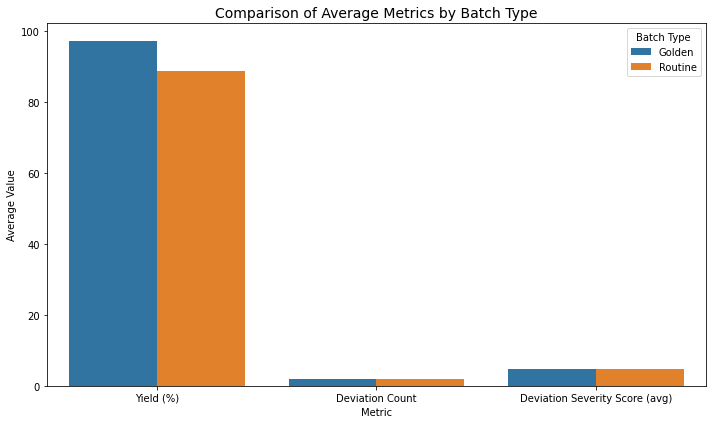

In [293]:
# Create a DataFrame with average metrics grouped by Batch Type
avg_metrics = exceldoc.groupby('Batch Type')[['Yield (%)', 'Deviation Count', 'Deviation Severity Score (avg)']].mean().reset_index()

# Melt the DataFrame to long format for seaborn (required for grouped bar plots)
avg_metrics_melted = avg_metrics.melt(id_vars = 'Batch Type', var_name = 'Metric', value_name = 'Average Value')

#Create a bar plot comparing the average metrics by Batch Type
plt.figure(figsize =(10,6)) # Width x Height in inches 
sns.barplot(data = avg_metrics_melted, x = 'Metric', y = 'Average Value', hue = 'Batch Type')

# Add chart elements for clarity
plt.title('Comparison of Average Metrics by Batch Type', fontsize=14)
plt.ylabel('Average Value')
plt.xlabel('Metric')
plt.legend(title = 'Batch Type')
plt.tight_layout()
plt.show()

#### Why it Didn't Work

> Because Yield is so much larger in scale than Deviation Count or Severity, it overwhelms the chart. This makes it **visually difficult** to detect performance differences across smaller metrics.

#### Improved Visualization: Metric Specific Subplots
> We solved this by splitting the metrics into individual subplots, giving each its own Y-axis for better scale comparison. 

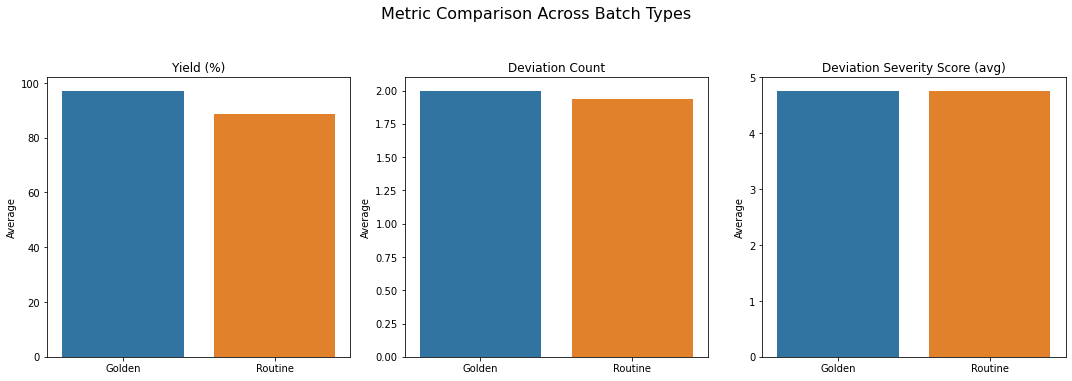

In [294]:
# Create a subplot grid: 1 row, 3 columns
plt.figure(figsize = (15,5)) # Width x Height in inches 

# Define the metrics to plot
metrics = ['Yield (%)', 'Deviation Count', 'Deviation Severity Score (avg)']

# Loop through each metric and create a subplot
for i, metric in enumerate(metrics):
    plt.subplot(1,3, i + 1)  #1 row, 3 columns, plot number ((i + 1))
    sns.barplot(data = avg_metrics, x = 'Batch Type', y = metric)
    plt.title(metric, fontsize = 12)
    plt.xlabel('')
    plt.ylabel('Average', fontsize=10)

plt.suptitle('Metric Comparison Across Batch Types', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

---

**Quick Recap**

This chunk enhances the previous summary by converting numeric trends into visual form. 
Golden batches continue to show higher **yield**, while  **deviation indicators** stay on par with Routine batches. 

This suggests Golden performance may stem from yield specific drivers, not necessarily cleaner or more controlled processes. That distinction is key for improving quality systems. 

***Why This Matters***


Understanding that Golden batches outperform on yield but not on deviation outcomes helps pinpoint where improvements are truly happening. It also raises high value questions for investigation:

- Are Golden batches succeeding due to **upstream yield drivers**, not deviation prevention?
- Can we replicate high yield outcomes **while reducing deviations**?
- Should deviation trends be viewed as **lagging indicators** rather than predictive quality controls?

> **Lagging indicators** are performance measurements that reflect what happened **after** a process is completed. They help evaluate *past performance*, but they don't help prevent issues in *real time*. 

***Key Insight***

Golden batches **excel in yield**, not in deviation related indicators, suggesting **isolated success, not systemic quality**.

---


## Chunk 7: Visualizing Feature Correlations (Heatmap)

To understand how batch metrics relate to one another, we'll generate a correlation heatmap across three of our key numeric features:

- Yield (%)
- Deviation Count
- Deviation Severity Score

This lets us:
- Spot which metrics are strongly related (positively or negatively).
- Detect tradeoffs (e.g., higher yield but more severe deviations).
- Identify where improvements might be linked or isolated. 

---

**Quick Summary**


We'll use a heatmap to show these relationships. Darker shades = stronger correlation (positive or negative). 

**Color Tips:** 
- **Dark red** = strong **positive** correlation (when one metric increases, so does the other)
- **Dark blue** = strong **negative** correlation (one goes up, the other goes down)
- **Lighter shades** = weak or no correlation

**Note:** To address label overlap from earlier versions, `plt.xticks(rotation=45)` was added to improve readability.

---

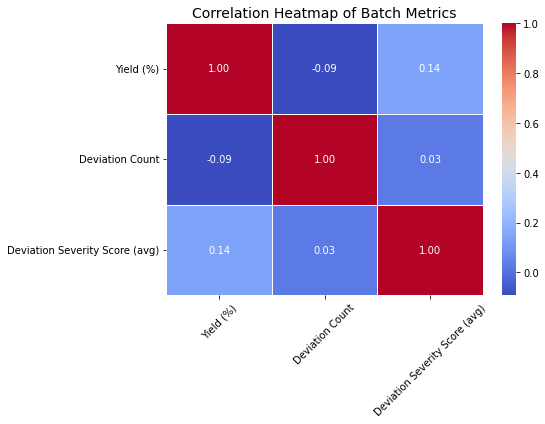

In [295]:
#Import the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Select the numeric columns we want to analyze for relationships
numeric_features = exceldoc[['Yield (%)', 'Processing Time (hrs)', 'Deviation Count', 'Deviation Severity Score (avg)']]

# Calculate how strongly each pair of columns are related (correlation matrix)
correlation_matrix = numeric_features.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize = (8,6)) #width x height in inches
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt='.2f', linewidths=0.5)

# Add chart elements
plt.title('Correlation Heatmap of Batch Metrics', fontsize = 14)
plt.xticks(rotation=45) #rotate x-axis labels for clarity
plt.tight_layout()
plt.show()


---
**Quick Recap**

Here’s what we found:

**1. Yield vs. Deviation Metrics**

Yield had a very weak **negative** correlation with Deviation Count (−0.09)

And a weak **positive** correlation with Deviation Severity Score (+0.14)

> ➤ ***Interpretation***: Higher yield doesn’t consistently mean smoother runs. Some high yield batches still had major issues.

**2. Deviation Count vs. Deviation Severity Score**

These two had a very weak **positive** correlation (+0.03)

> ➤ ***Interpretation***: Deviation count and severity don’t rise together as much as expected. Some batches may have many minor deviations rather than a few severe ones.

**3. Processing Time**
(Not included in this analysis, since it was stored as a text column rather than numeric.)

> ***Reminder***: We'll be exploring this separately in the next chunk using visual tools (boxplot + stripplot).

---

**Overall Takeaway:** 

Optimizing yield **doesn't guarantee improvements** across other metrics. **Correlation analysis** reveals what's truly connected. 


## Chunk 8: Processing Time Distribution (Boxplot + Stripplot)

To explore processing time differences between Golden and Routine batches, we'll use a combination of boxplot and stripplot visualizations. This will help us compare both central tendencies and outliers.

---

**Quick Summary**

This chart visualizes how processing time differs by batch type:

- **Boxplot** shows median, quartiles, and outliers.

- **Stripplot** overlays each individual batch for detail.


---


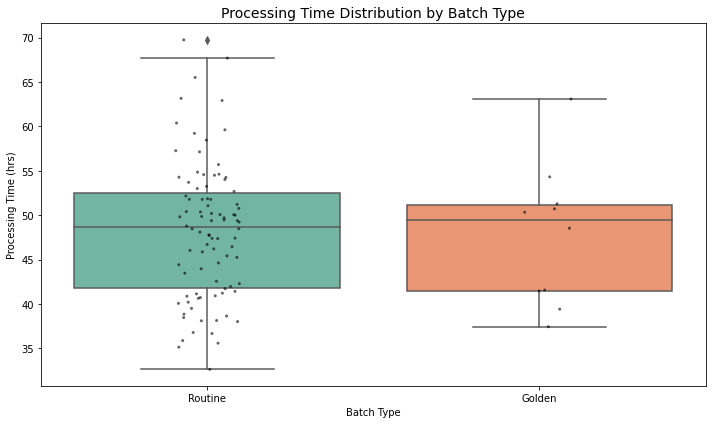

In [296]:
# Processing Time was originally stored as 'hh mm'text.
# We converted it to float (in hours) for numerical analysis. 

#Step 1: Convert 'hh mm' -> float
def convert_to_float(time_str):
    hours = int(time_str.split('h')[0].strip()) #Extract hours
    minutes = int(time_str.split('h')[1].replace('m','').strip())  #Extract minutes
    return hours + minutes / 60   #Convert to total hours as float

#Step 2: Apply conversion
exceldoc['Processing_Time_float'] = exceldoc['Processing Time (hrs)'].apply(convert_to_float)


#Step 3-5: Create Box + Strip Plot
plt.figure(figsize = (10,6)) 
sns.boxplot(data = exceldoc, x = 'Batch Type', y = 'Processing_Time_float', palette = 'Set2')
sns.stripplot(data = exceldoc, x = 'Batch Type', y = 'Processing_Time_float', color = 'black', size = 3, jitter = True, alpha = 0.6)
plt.title('Processing Time Distribution by Batch Type', fontsize = 14)
plt.xlabel('Batch Type')
plt.ylabel('Processing Time (hrs)')
plt.tight_layout()
plt.show()



---

**Quick Recap**

This chunk explored how processing time differs between Golden and Routine batches using a boxplot and stripplot combo.

What we found:

- **Golden batches** tend to have **shorter and more consistent** processing times
- **Routine batches** show **wider variability** and more extreme outliers.

> ➤ ***Interpretation*** 
> - Golden batches operate within a **narrower, more predictable range** of processing times. 
> - Routine batches show **wider spread and more outliers**, hinting at **inconsistent process conditions**. 

---

**Why it Matters**

We excluded Processing Time from the earlier correlation heatmap because it was stored as text. But once converted, we saw a clear pattern. 

> Golden batches not only yield better, but they also move through production with **more stable timing, reducing unpredictability  in the process**. 

This supports the idea that process control consistency could be a hidden driver of success, even if it doesn't directly explain deviations. 

In [297]:
#Confirm that the 'Processing_Time_float'column is now stored as numeric (float64)
exceldoc['Processing_Time_float'].dtype

dtype('float64')

## Key Takeaways and Recommendations


#### Key Visuals:
- Bar Chart: Average metrics by batch type (Golden vs Routine) 
- Stripplot + Boxplot: Processing time distribution and outliers
- Heatmap: Correlations between batch performance metrics

---

#### Key Findings:

- Golden batches had higher average yields compared to Routine batches.
- Average deviation count and severity score were nearly identical between the two groups:
- Deviation Count: Golden (2.00) vs. Routine (1.93)
- Deviation Severity Score: Golden (4.76) vs. Routine (4.75)
- Processing time analysis (via boxplot and stripplot) showed Golden batches had shorter and more consistent processing times, a possible sign of stronger process control, though this metric was not analyzed alongside yield or deviation outcomes in this project.

---

#### Recommendations: 
- Use this Golden Batch Comparator as a benchmarking tool to evaluate internal process performance over time.
- Help operators and engineers visualize what “good” looks like by highlighting traits of consistently high-performing batches.
- Investigate deviations from golden behavior to guide SOP improvements or root cause investigations.
- Extend this concept into live dashboards that connect to LIMS or historian data for real-time batch monitoring and alerts. 

---

#### Next Steps
- Validate this approach with real batch data (e.g., historian or LIMS exports) to confirm insights and expand impact.
- Add variables such as equipment used, cost impact, or operator assignment to deepen root cause and efficiency analysis.
- Translate insights into onboarding/training material for new hires or deviation response teams.
- Package this into a dashboard prototype or compliance tool to support MSAT, QA, and manufacturing teams.

---

#### Final Notes
This notebook demonstrates:
- Data inspection and transformation using pandas
- Visualization using matplotlib and seaborn
- Practical GMP applications for batch investigations and deviation analysis
- A foundation for building advanced batch monitoring tools and decision-support systems

> All code was written and executed in a local Jupyter Notebook environment. 

